In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Veri yükleme
df = pd.read_csv("C:\\Users\\Ahmet\\Documents\\Projeler\\Deprem Yıkım AI\\Deprem Yıkım AI\\csv_building_structure.csv", index_col='building_id')

In [3]:
# Veri temizleme
# Metin sütunlarındaki boşlukları temizle
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()

In [4]:
# Eksik değer kontrolü ve doldurma
missing_values = df.isnull().sum()
if missing_values.any():
    print("Eksik değerler tespit edildi:")
    print(missing_values[missing_values > 0])
    df.dropna(inplace=True)  # Basitlik için eksik verileri kaldırıyoruz

In [5]:
# Benzersiz değerlerin analiz edilmesi
print("Benzersiz değer sayısı:")
print(df.select_dtypes(include='object').nunique())

Benzersiz değer sayısı:
land_surface_condition          3
foundation_type                 5
roof_type                       3
ground_floor_type               5
other_floor_type                4
position                        4
plan_configuration             10
condition_post_eq               8
damage_grade                    5
technical_solution_proposed     4
dtype: int64


In [6]:
# Hedef değişken ve özellik seçimi
X = df.drop(columns=['damage_grade', 'vdcmun_id', 'ward_id'])  # Gereksiz sütunlar kaldırıldı
y = df['damage_grade']

In [7]:
# Kategorik ve sayısal sütunların ayrıştırılması
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [8]:
# Ön işleme adımları
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ]
)

In [9]:
# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
# Model oluşturma
rf_model = RandomForestClassifier(random_state=42)

In [11]:
# Pipeline tanımlama
from sklearn.pipeline import Pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf_model)
])

In [12]:
# Modeli eğitme
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'condition_post_eq',
       'technical_solution_proposed'],
      dtype='object')),
                                                 ('num', StandardScaler(),
                                                  Index(['distric...
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [13]:
# Tahmin yapma
y_pred = model_pipeline.predict(X_test)

In [17]:
# Performans değerlendirmesi
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[14260  1434    41    28     0]
 [  708 14272  2141   327     3]
 [   47  1877 20738  4592    29]
 [    7    96  3601 32692   373]
 [    2    10    57  2310 52774]]
Classification Report:
              precision    recall  f1-score   support

     Grade 1       0.95      0.90      0.93     15763
     Grade 2       0.81      0.82      0.81     17451
     Grade 3       0.78      0.76      0.77     27283
     Grade 4       0.82      0.89      0.85     36769
     Grade 5       0.99      0.96      0.97     55153

    accuracy                           0.88    152419
   macro avg       0.87      0.87      0.87    152419
weighted avg       0.89      0.88      0.88    152419



In [18]:
# Önemli özelliklerin görselleştirilmesi
importances = rf_model.feature_importances_
feature_names = np.hstack([
    preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols),
    numerical_cols
])

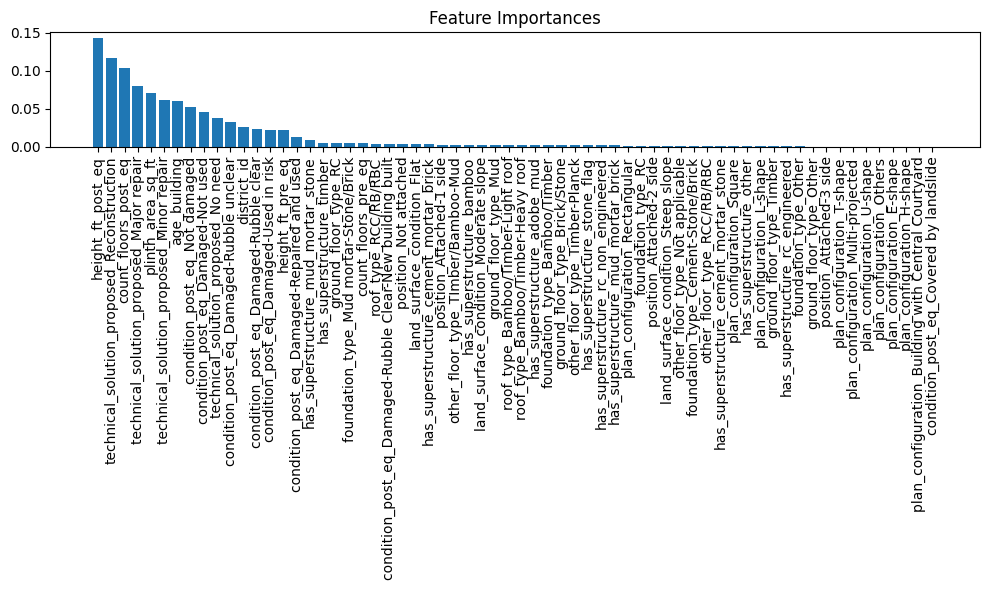

In [19]:
# Önem sırasına göre sıralama
sorted_indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[sorted_indices], align="center")
plt.xticks(range(len(importances)), feature_names[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()